FFR 120  
Felix Waldschock

HW 4
Exercise 14.3
## Explicit Euler
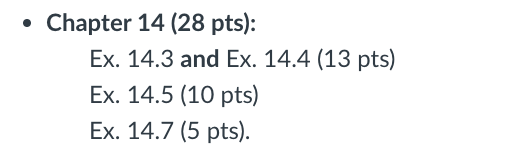  
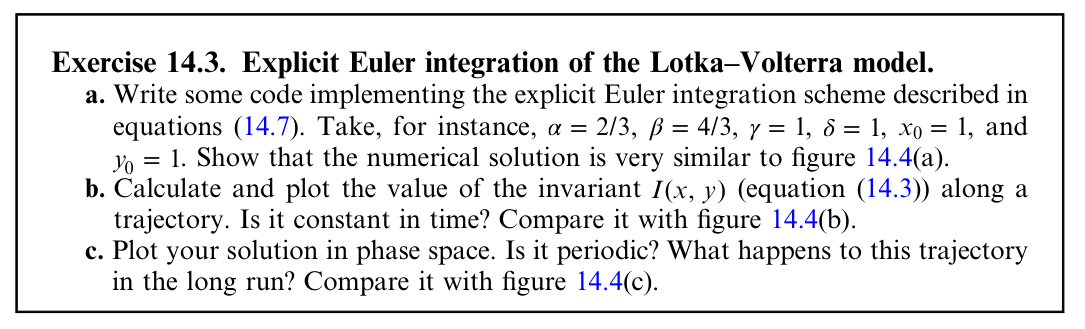

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


# a.)
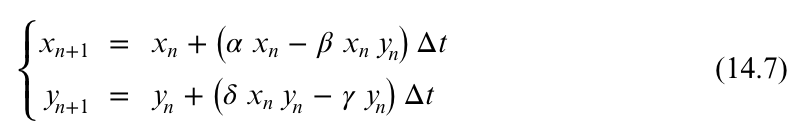

In [38]:
# parameters
alpha = 2/3
beta = 4/3
delta = 1
gamma = 1

# initial conditions
x0 = 1
y0 = 1
dT = 0.05

In [39]:
def explicitEulerIntegration(x0, y0, alpha, beta, delta, gamma, dT, N):
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0
    y[0] = y0
    for i in range(N-1):
        x[i+1] = x[i] + (alpha * x[i] - beta*x[i]*y[i]) * dT
        y[i+1] = y[i] + (delta * x[i] * y[i] - gamma*y[i]) * dT
    return x, y


In [40]:
# Compute for a.)

# plot the two population (x prey, y predator) for the time interval [0,20]
tMax = 20
N = int(tMax / dT)
x, y = explicitEulerIntegration(x0, y0, alpha, beta, delta, gamma, dT, N)
t = np.linspace(0, N*dT , N)


# b.)
Value to invariant
- Is it constant in time? -> No it is not
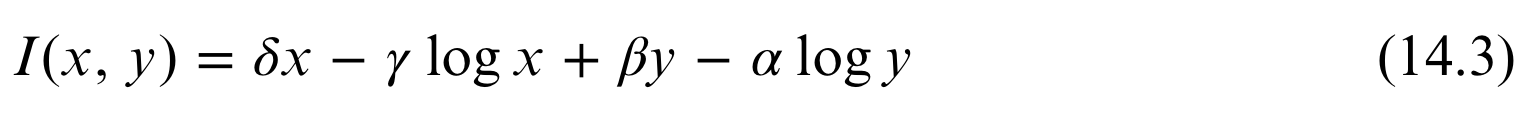

In [41]:
def conservedQuantity(x, y):
    return delta * x - gamma * np.log(x) + beta * y - alpha * np.log(y)

In [42]:
# compute the conserved quantity for the found x, y solution
C = conservedQuantity(x, y)

# c.)
Plot the solution in the phasespace
- Is it periodic? 
- What happens to this trajectory in the long run?


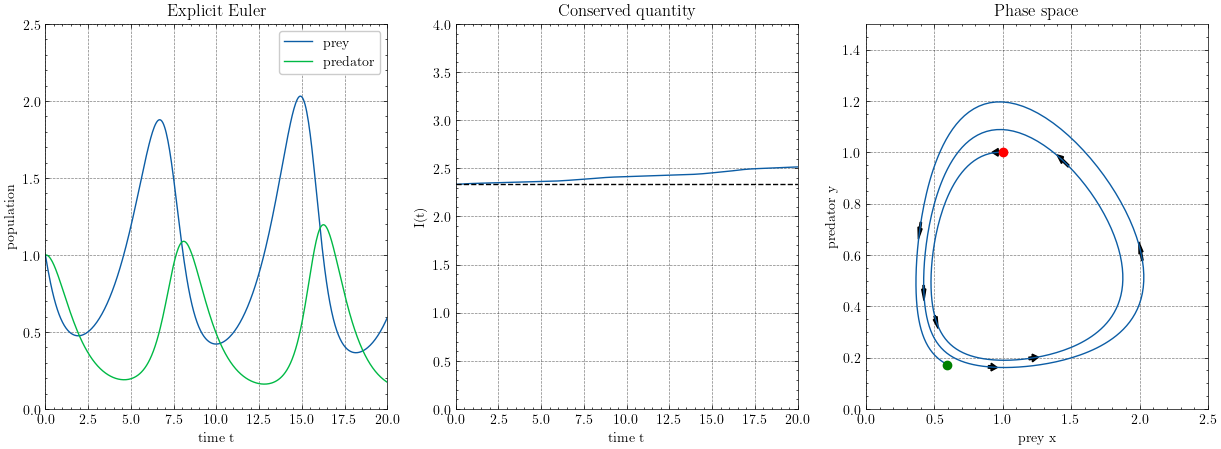

In [43]:
# Plot the data
# create a subplot with 1x3 grid and set the size to 15x5
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].plot(t, x, label='prey')
ax[0].plot(t, y, label='predator')
ax[0].set_xlabel('time t')
ax[0].set_ylabel('population')
ax[0].set_title('Explicit Euler')
ax[0].legend()
ax[0].set_xlim(0, tMax)
ax[0].set_ylim(0, 2.5)

# second plot -> Conserved quantitity I(x,y)
ax[1].plot(t, C)
ax[1].set_xlabel('time t')
ax[1].set_ylabel('I(t)')
ax[1].set_title('Conserved quantity')
# plot a horizontal line at the initial value
ax[1].axhline(C[0], color='black', linestyle='--')
ax[1].set_xlim(0, tMax)
ax[1].set_ylim(0, 4)

# third plot -> phase space
ax[2].plot(x, y)
ax[2].set_xlabel('prey x')
ax[2].set_ylabel('predator y')
ax[2].set_title('Phase space')
ax[2].set_xlim(0, 2.5)
ax[2].set_ylim(0, 1.5)

# mark the initial position with a red dot, and the final position with a green dot
ax[2].plot(x0, y0, 'ro')
ax[2].plot(x[-1], y[-1], 'go')
# show the direction of the flow with some arrows on the trajectory
for i in range(0, N, 50):
    ax[2].arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0.01, color='black')

